# EDA Sleep Health

In [2]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 01. 데이터 수집 및 로드

In [3]:
df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')

# 'BMI Category' 컬럼의 각 고유 값별 빈도수 확인
bmi_category_counts = df['BMI Category'].value_counts()

# 결과 출력
print(bmi_category_counts)

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64


## 02. 데이터 구조 및 변수 이해

In [4]:
print(df.shape) # 891행 12열
print(df.dtypes)
print()
df.info()

(374, 13)
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non

## 07. 상관관계 및 교차분석
- 연속형 데이터 : 상관계수
- 범주형 데이터 : 교차표

In [17]:
# 한글 폰트 설정
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 파일 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [6]:
# 상관 행렬 확인
corr_mat = df.corr(numeric_only=True)
corr_mat

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


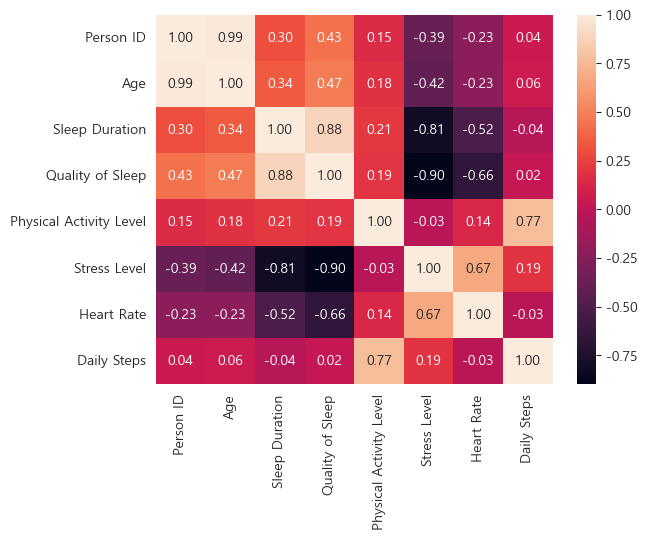

In [18]:
# 히트맵 생성 (Age - Quality of Sleep : 0.47 / Age - Gender_code : 0.60 / Physical Activity Level - Daily Steps : 0.77 / Stress Level - Heart Rate : 0.67)

sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

In [8]:
# 성별 구간화
bins = [19, 29, 39, 49, 59, 69, 79, 89, 99]  # 원하는 구간으로 수정 가능
labels = ['20~29', '30~39', '40~49', '50~59', '60~69', '70~79', '80~89', '90~99']

df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# 교차표 출력
print(pd.crosstab(df['Age_group'], df['Sleep Duration']))

Sleep Duration  5.8  5.9  6.0  6.1  6.2  6.3  6.4  6.5  6.6  6.7  ...  7.6  \
Age_group                                                         ...        
20~29             0    3    4    3    2    1    0    2    0    0  ...    0   
30~39             2    0   14    8    6    0    2    1    2    2  ...    5   
40~49             0    1    1    4    4   12    7   21   14    3  ...    5   
50~59             0    0   12   10    0    0    0    2    4    0  ...    0   

Sleep Duration  7.7  7.8  7.9  8.0  8.1  8.2  8.3  8.4  8.5  
Age_group                                                    
20~29             0    4    0    0    0    0    0    0    0  
30~39            14    7    5    2    0    0    0    0    0  
40~49            10   17    2    0    2    0    0    0    0  
50~59             0    0    0   11   13   11    5   14   13  

[4 rows x 27 columns]


In [9]:
# 성별, 나이, 수면시간의 상관관계 분석
pivot_age_pclass = df.pivot_table(index='Age', columns='Gender', values='Sleep Duration')
pivot_disorder_pclass = df.pivot_table(index='Sleep Disorder', columns='Gender', values='Sleep Duration', aggfunc='mean')
display(pivot_age_pclass)
display(pivot_disorder_pclass)

Gender,Female,Male
Age,,
27,NaN,6.100000
28,NaN,6.020000
29,6.500000,6.700000
30,6.400000,7.781818
31,7.900000,7.417647
32,NaN,6.588235
33,6.200000,6.036364
34,5.800000,NaN
35,7.200000,7.218182


Gender,Female,Male
Sleep Disorder,,
Insomnia,6.633333,6.551220
Sleep Apnea,7.035821,7.009091


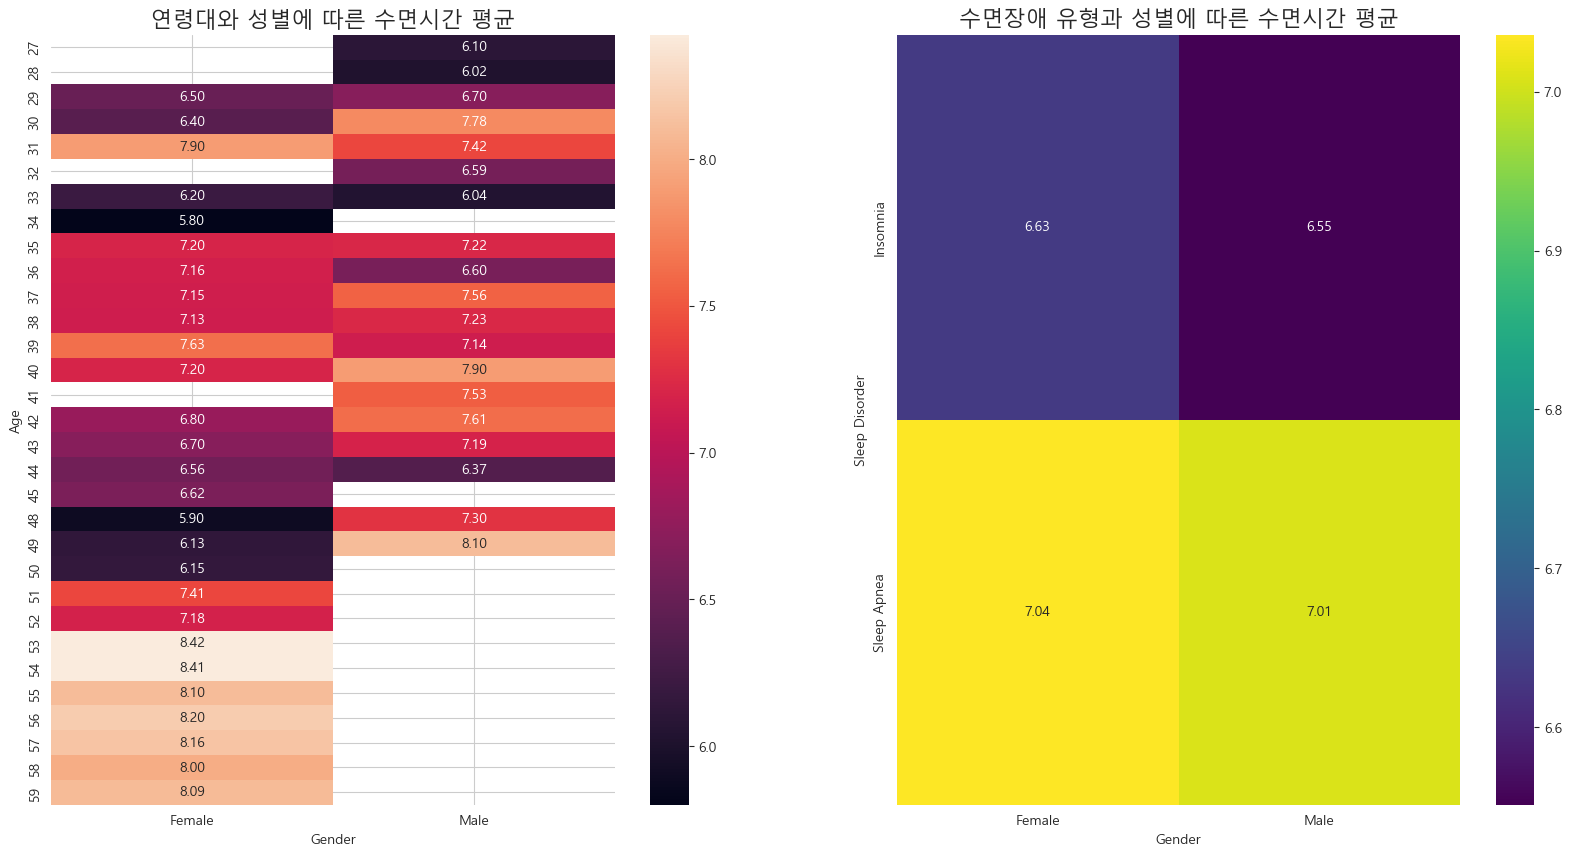

In [19]:
# 히트맵(시각화)
_, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(pivot_age_pclass, annot=True, fmt='.2f', ax=ax[0])
ax[0].set_title('연령대와 성별에 따른 수면시간 평균', fontsize=16)
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Age')

sns.heatmap(pivot_disorder_pclass, annot=True, fmt='.2f', ax=ax[1], cmap='viridis')
ax[1].set_title('수면장애 유형과 성별에 따른 수면시간 평균', fontsize=16)
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Sleep Disorder')
plt.show()

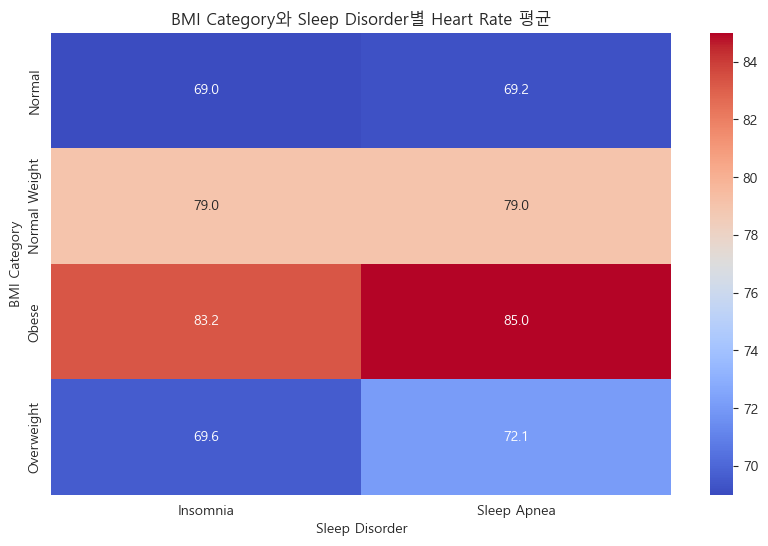

In [20]:
pivot = df.pivot_table(index='BMI Category', columns='Sleep Disorder', values='Heart Rate', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('BMI Category와 Sleep Disorder별 Heart Rate 평균')
plt.show()

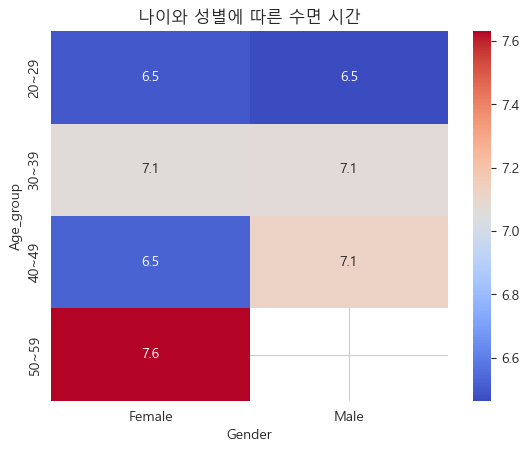

In [24]:
pivot = df.pivot_table(index='Age_group', columns='Gender', values='Sleep Duration', observed=True)
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('나이와 성별에 따른 수면 시간')
plt.show()

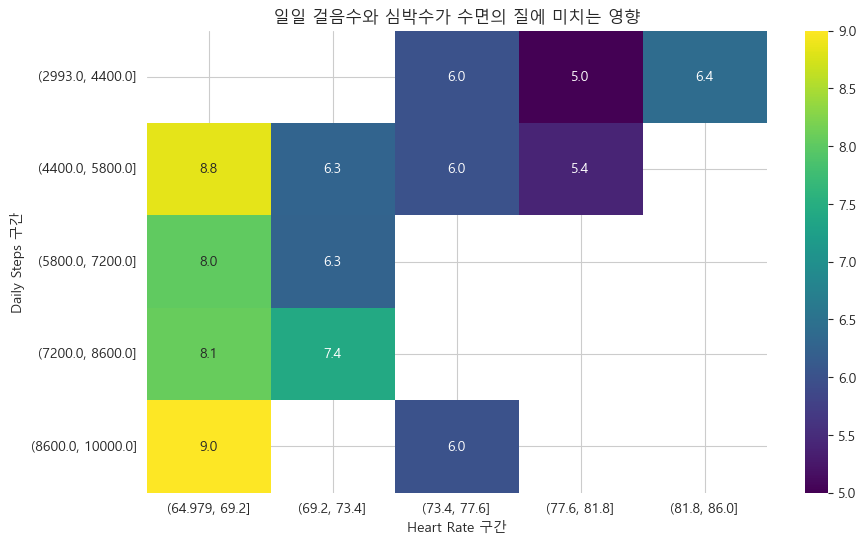

In [25]:
df['Steps_bin'] = pd.cut(df['Daily Steps'], bins=5)
df['HR_bin'] = pd.cut(df['Heart Rate'], bins=5)

# 피벗테이블
pivot = df.pivot_table(index='Steps_bin', columns='HR_bin', values='Quality of Sleep', aggfunc='mean',observed=True)

# 히트맵
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='viridis')
plt.title('일일 걸음수와 심박수가 수면의 질에 미치는 영향')
plt.xlabel('Heart Rate 구간')
plt.ylabel('Daily Steps 구간')
plt.show()

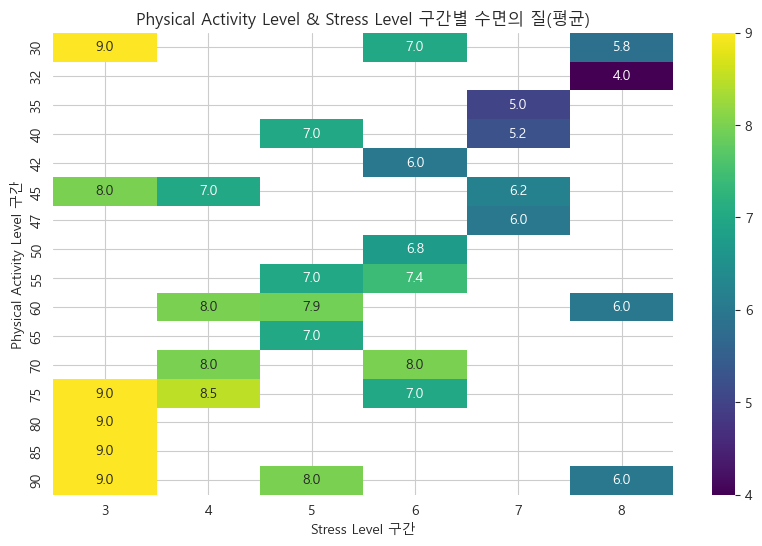

In [23]:
pivot = df.pivot_table(index='Physical Activity Level', columns='Stress Level', values='Quality of Sleep', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='viridis')
plt.title('Physical Activity Level & Stress Level 구간별 수면의 질(평균)')
plt.xlabel('Stress Level 구간')
plt.ylabel('Physical Activity Level 구간')
plt.show()

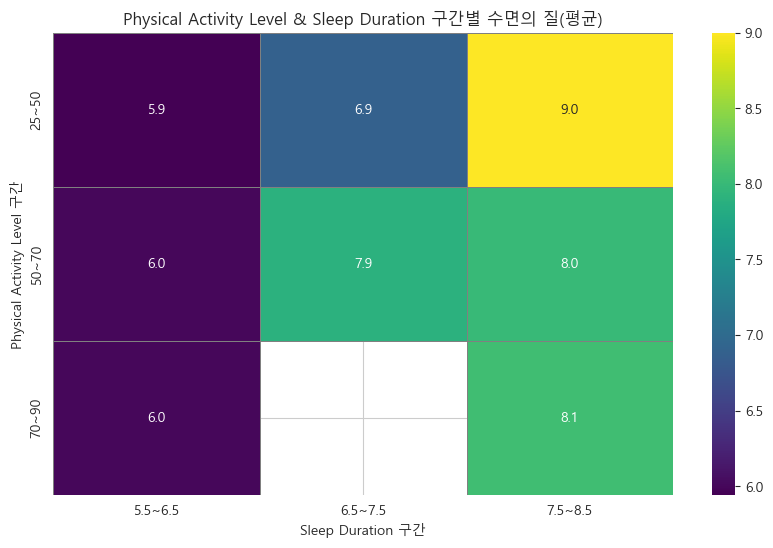

In [55]:
# Sleep Duration 구간화
df['Sleep_Duration_Bin'] = pd.cut(
    df['Sleep Duration'],
    bins=[5.5, 6.5, 7.5, 8.5],       # 예시 구간
    labels=['5.5~6.5', '6.5~7.5', '7.5~8.5'],
    include_lowest=True
)

# Physical Activity Level 구간화
df['Activity_Level_Bin'] = pd.cut(
    df['Physical Activity Level'],
    bins=[25, 50, 70, 90],
    labels=['25~50', '50~70', '70~90'],
    include_lowest=True
)

pivot = df.pivot_table(
    index='Activity_Level_Bin',
    columns='Sleep_Duration_Bin',
    values='Quality of Sleep',
    aggfunc='mean',
    observed=True
)

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title('Physical Activity Level & Sleep Duration 구간별 수면의 질(평균)')
plt.xlabel('Sleep Duration 구간')
plt.ylabel('Physical Activity Level 구간')
plt.show()

In [ ]:
Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'BP high', 'BP low', 'Age Group', 'BP high Group', 'BP low Group',
       'Heart Rate Group', 'Daily Steps Group', 'PhAL Group',
       'Sleep Duration Group', 'Gender Label', 'Occupation Label', 'BMI Label',
       'Sleep Label'],